Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,713,953 (14.17 MB)

 Trainable params: 3,713,953 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 959ms/step - accuracy: 0.5611 - loss: 0.6617 - val_accuracy: 0.7843 - val_loss: 0.5554
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7474 - loss: 0.5246 - val_accuracy: 0.8039 - val_loss: 0.5218
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7793 - loss: 0.5219 - val_accuracy: 0.8235 - val_loss: 0.5148
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 919ms/step - accuracy: 0.8242 - loss: 0.4139 - val_accuracy: 0.8431 - val_loss: 0.4765
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 900ms/step - accuracy: 0.8262 - loss: 0.4071 - val_accuracy: 0.8431 - val_loss: 0.4424
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8566 - loss: 0.3398 - val_accuracy: 0.7843 - val_loss: 0.4640
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8591 - loss: 0.3145 - val_accuracy: 0.8627 - val_loss: 0.3877
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8978 - loss: 0.2524 - val_accuracy: 0.8431 - val_loss: 0.4350
Ep

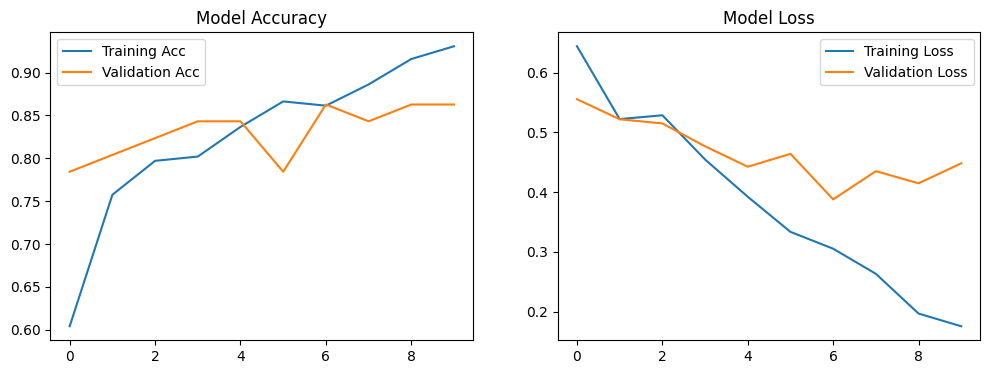

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


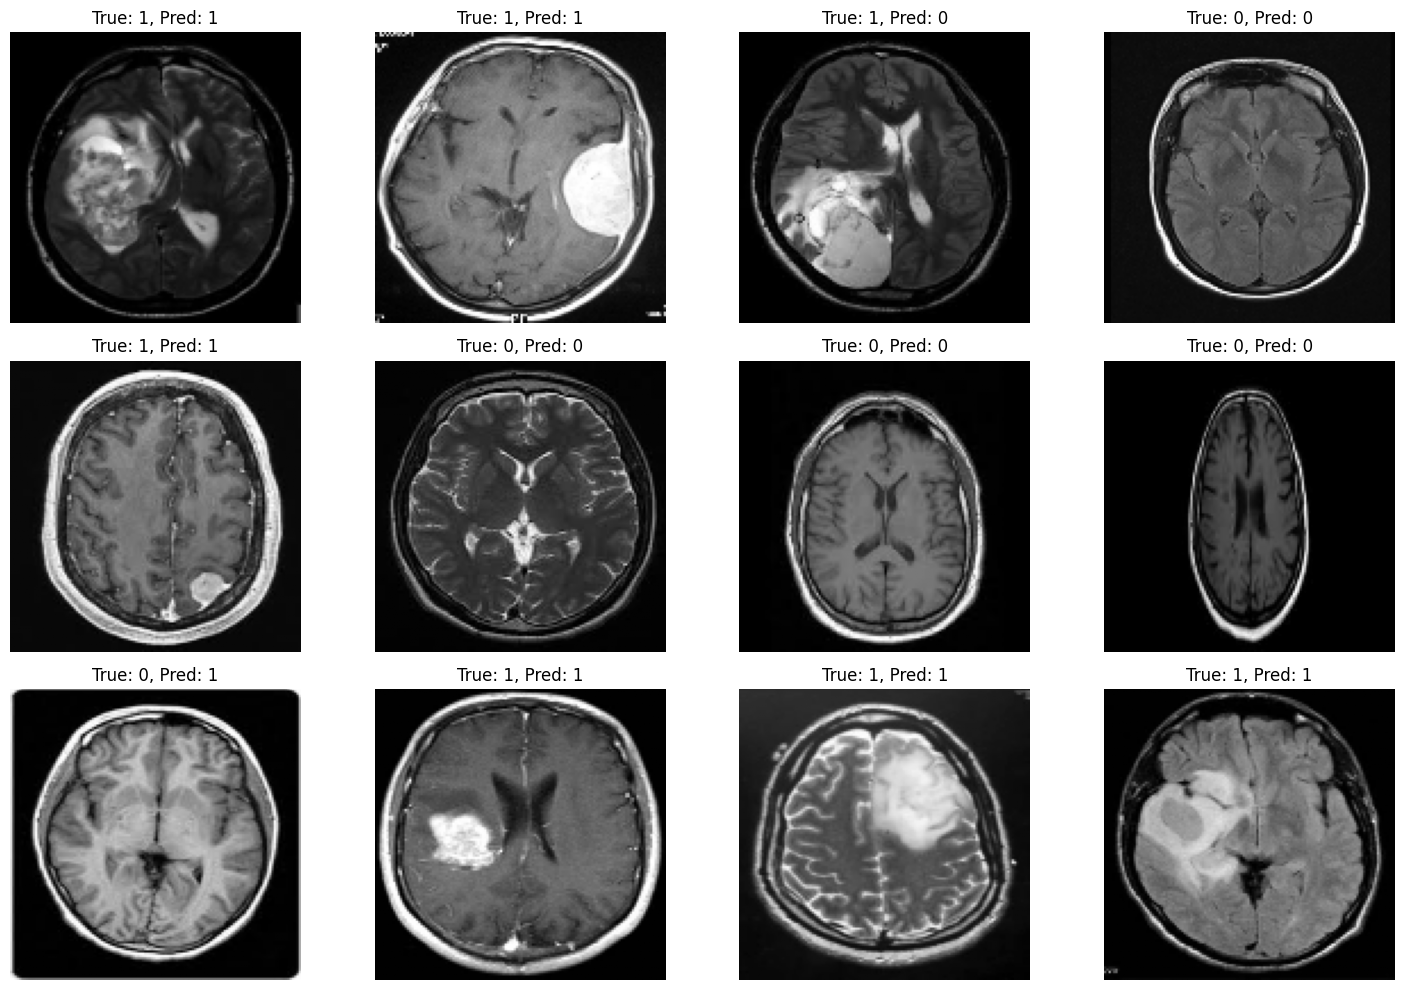

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile, glob, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

zip_path = "/content/drive/MyDrive/FDL 5th Sem Practical Codes/MRI DATASET.zip"
extract_path = "/content/mri_dataset"
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

yes_path = os.path.join(extract_path, "yes/*")
no_path  = os.path.join(extract_path, "no/*")

has_tumor, no_tumor = [], []

for file in glob.iglob(yes_path):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        has_tumor.append((img, 1))

for file in glob.iglob(no_path):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        no_tumor.append((img, 0))

all_data = has_tumor + no_tumor
np.random.shuffle(all_data)

data   = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 128, 128, 1) / 255.0
x_test  = x_test.reshape(x_test.shape[0], 128, 128, 1) / 255.0

model = Sequential([
    Conv2D(64, kernel_size=3, activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.legend(); plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title("Model Loss")

plt.show()

predictions = model.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

plt.figure(figsize=(15,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i].reshape(128,128), cmap="gray")
    plt.title(f"True: {y_test[i]}, Pred: {predicted_classes[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
